In [1]:
import qiskit


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
# service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
# service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

In [3]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import math

{'011': 50007, '001': 49993}


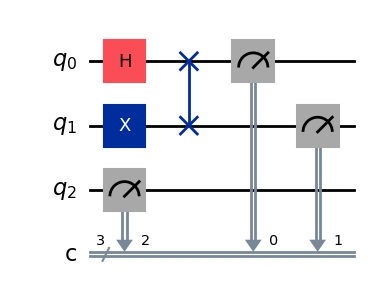

In [4]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.x(1)
# circuit.barrier()
# circuit.ccx(0, 1, 2)
circuit.swap(0, 1)

# with circuit.if_else()
circuit.measure(range(3), range(3))
#chosing backend and executing job
backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(circuit, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=100000)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)
plot_histogram(counts)

circuit.draw('mpl')

{'11': 1, '00': 1}


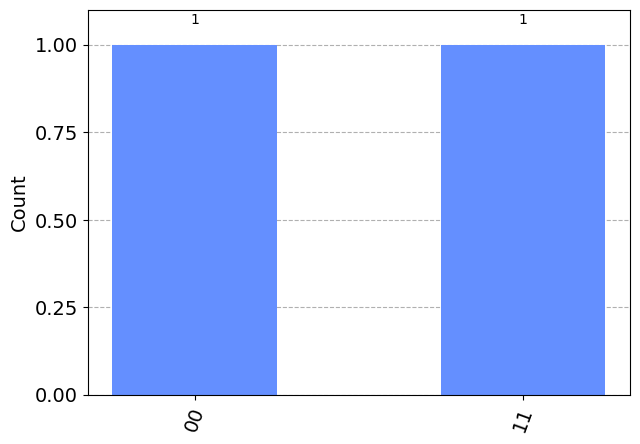

In [5]:
from qiskit.circuit import QuantumCircuit, Clbit, Qubit
bits = [Qubit(), Qubit(), Clbit(), Clbit()]
qc = QuantumCircuit(bits)

# with qc.while_loop((bits[2], 0)):
#     # qc.h(0)
#     # qc.cx(0, 1)
#     qc.x(0)
#     qc.measure(0, 0)

qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl')

#chosing backend and executing job
backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=2)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)
plot_histogram(counts)
